### 2D Packet Visualization_ Single Packet_Plotly ###

In [28]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data
from tardis.io.config_reader import Configuration

In [29]:
# Reading the Configuration stored in `tardis_example.yml` into config

config = Configuration.from_yaml("tardis_example.yml")

In [30]:
config["montecarlo"]["tracking"]["track_rpacket"]=True
config["montecarlo"]["seed"]= 8735653
config["montecarlo"]["no_of_packets"]=1
config["montecarlo"]["iterations"]=1
config["montecarlo"]["last_no_of_packets"]=1
config["montecarlo"]["no_of_virtual_packets"]=0

In [31]:
config

{'tardis_config_version': 'v1.0',
 'supernova': {'luminosity_requested': <Quantity 1.05927636e+43 erg / s>,
  'time_explosion': <Quantity 13. d>,
  'luminosity_wavelength_start': <Quantity 0. Angstrom>,
  'luminosity_wavelength_end': <Quantity inf Angstrom>},
 'atom_data': 'kurucz_cd23_chianti_H_He.h5',
 'model': {'structure': {'type': 'specific',
   'velocity': {'start': <Quantity 11000. km / s>,
    'stop': <Quantity 20000. km / s>,
    'num': 20},
   'density': {'type': 'branch85_w7',
    'w7_time_0': <Quantity 0.00023148 d>,
    'w7_rho_0': <Quantity 3.e+29 g / cm3>,
    'w7_v_0': <Quantity 1. km / s>}},
  'abundances': {'type': 'uniform',
   'O': 0.19,
   'Mg': 0.03,
   'Si': 0.52,
   'S': 0.19,
   'Ar': 0.04,
   'Ca': 0.03}},
 'plasma': {'disable_electron_scattering': False,
  'ionization': 'lte',
  'excitation': 'lte',
  'radiative_rates_type': 'dilute-blackbody',
  'line_interaction_type': 'macroatom',
  'initial_t_inner': <Quantity -1. K>,
  'initial_t_rad': <Quantity -1. K>,


#### Running the simulation (long output) ####

<div class="alert alert-info">

Note
    
The progress of the simulation can be tracked using progress bars which are displayed when the notebook is run, but are not displayed in the documentation. 
    
</div>

In [32]:
sim = run_tardis(config)

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:93)
[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /home/jayant/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:33)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:203)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:207)
[py.warnings         ][WARNING]  
	/home/jayant/Desktop/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in true_divide

 (warnings.py:109)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 1 (base.py:378)


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][CRITICAL]  
	No r-packet escaped through the outer boundary. (base.py:394)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 0.000e+00 erg / s
	Luminosity absorbed  = 1.031e+43 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 1 iterations 
	Simulation took 0.08 s
 (base.py:468)


<div class="alert alert-info">
    
Note

When running this notebook locally or in interactive mode, a [convergence plot](io/visualization/convergence_plot.ipynb) will show up.

</div>

In [33]:
sim.runner.rpacket_tracker[0].r

array([1.23552000e+15, 1.26311303e+15, 1.23552000e+15])

In [34]:
sim.runner.rpacket_tracker[0].mu

array([ 0.42575333, -0.68522265, -0.66751134])

In [35]:
sim.model.radius

<Quantity [1.235520e+15, 1.286064e+15, 1.336608e+15, 1.387152e+15,
           1.437696e+15, 1.488240e+15, 1.538784e+15, 1.589328e+15,
           1.639872e+15, 1.690416e+15, 1.740960e+15, 1.791504e+15,
           1.842048e+15, 1.892592e+15, 1.943136e+15, 1.993680e+15,
           2.044224e+15, 2.094768e+15, 2.145312e+15, 2.195856e+15,
           2.246400e+15] cm>

#### Plotly plots ####

In [36]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import math
import pandas as pd
import numpy as np

### Mathematical expression for finding coordinates ###

\
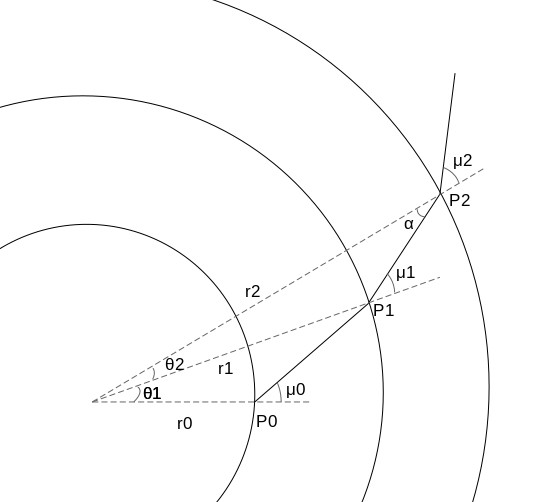

<br><br>The diagram above shows the packet trajectory as it starts from photosphere `P0` and continues to move along the subsequent points `P1`, `P2` and so on.

<div class="alert alert-info">
    <b>Note:</b><br>
    Here μ is the angle of direction of packet propagation with respect to line joining the center.
</div>

To determine the polar coordinates of any arbitrary point, let say `P2`, we need `r2` and `θ2`. `r2` is already present in the array obtained from the simulation. To determine `θ2`, we use sine rule and apply it on triangle `OP1P2`, where `O` is the center.

$$
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(\alpha)}
$$

Now, writing `α` in terms of `μ1` and `θ2`

$$ 
α = μ_{1} - θ_{2} \\ \\
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(μ_{1} - θ_{2})}
$$

Thus,

$$ 
θ_{2} = -\sin^{-1}(\frac{r1}{r2}\sin(\mu_{1})) + \mu_{1}
$$

Hence, for `ith` point, `θ` will be:

$$ 
θ_{i} = -\sin^{-1}(\frac{r_{i-1}}{r_{i}}\sin(\mu_{i-1})) + \mu_{i-1}
$$

In [42]:
# function for getting theta angles
def get_thetas(r_track,mu_track):
    theta=[]
    for i in range(len(r_track)):
        if(i==0):
            theta.append(0)
        else:
            print(math.asin(-1*r_track[i-1]*math.sin(math.acos(mu_track[i-1]))/r_track[i]) + math.acos(mu_track[i-1]))
            theta.append(theta[-1]+math.asin(-1*r_track[i-1]*math.sin(math.acos(mu_track[i-1]))/r_track[i]) + math.acos(mu_track[i-1]))
            print(theta[i])
    return theta

In [43]:
r = sim.runner.rpacket_tracker[0].r
mu = sim.runner.rpacket_tracker[0].mu
theta = get_thetas(r,mu)

# Converting theta array from radians to degrees
theta=(np.array(theta)*180)/(math.pi)

# Creating dataframe for r and theta values
df = pd.DataFrame(r,columns=['r'])
df['theta']=theta
df

0.04435160147434236
0.04435160147434236
1.4857708232904028
1.5301224247647451


,r,theta
0,1.235520e+15,0.000000
1,1.263113e+15,2.541160
2,1.235520e+15,87.669557


In [41]:
r = sim.runner.rpacket_tracker[0].r
mu = sim.runner.rpacket_tracker[0].mu
theta = get_thetas(r,mu)

# Converting theta array from radians to degrees
theta=(np.array(theta)*180)/(math.pi)

# Creating dataframe for r and theta values
df = pd.DataFrame(r,columns=['r'])
df['theta']=theta

# Creating polar diagram
fig = px.line_polar(df,r="r",theta="theta",start_angle=0, direction="counterclockwise", markers=True, template="plotly_dark")

# Adding photosphere and the shell to the figure
for i in range(len(sim.model.radius.value)):
    if i==0:
        fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
            line_color="LightSeaGreen",
            fillcolor="PaleTurquoise",
            opacity=0.5
        )
    else:
        fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
            line_color="LightSeaGreen",
            opacity=0.5
        )

# Setting layout width
fig.update_layout(width=1000, height=1000)

fig.show()